# Tutorial 2: How to visualize estimated posteriors and perform Bayesian model comparison

Details of the method are explained in:   
Zeraati, R., Engel, T. A., & Levina, A. (2022). A flexible Bayesian framework for unbiased estimation of timescales. Nature Computational Science, 2(3), 193-204. https://www.nature.com/articles/s43588-022-00214-3

To start you need to have:
Python >= 3.7.1,
Numpy >= 1.15.4 ,
Scipy >= 1.1.0. 

and for visualizations:
Matplotlib >= 3.0.2,
Seaborn >= 0.9.0 

You can install seaborn from https://seaborn.pydata.org/installing.html 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # we only use seaborn for smoothing the posteriors with kde

import numpy as np
from scipy import stats

# add the path to the abcTau package
import sys
sys.path.append('./abcTau')
# import the abcTau package
import abcTau


# graphical properties for figures
sns.set_context('talk',font_scale= 1.5)
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8" 
plt.rcParams.update({'font.size': 12})

## Plot marginal posteriors and aABC params

This is the example in Fig. 3C

In [2]:
# load abc results
data_abc_path = 'example_abc_results/'
filename = '2on_inhomPois_tau5_80_T1000_lag110_steps45'
abc_results = np.load(data_abc_path + filename + '.npy', allow_pickle=True)
ind = filename.find('steps') 
final_step = int(filename[ind+5] + filename[ind+6])

# extract estimated parameters
theta_accepted = abc_results[final_step-1]['theta accepted']
tau1 = theta_accepted[0]
tau2 = theta_accepted[1]
c1 = theta_accepted[2]

# extract the development of the error threshold and acceptance rate during fitting (discarding first iteration)
eps = []
accR = []
steps = np.arange(1,final_step+1)[1:]
for i in range(final_step): 
    step_results = abc_results[i]
    eps.append(step_results['epsilon'])
    accR.append(step_results['n accepted']/step_results['n total'])
eps = eps[1:]
accR = accR[1:]

# ground truth values 
tau1_gt = 5
tau2_gt = 80
c1_gt = 0.4

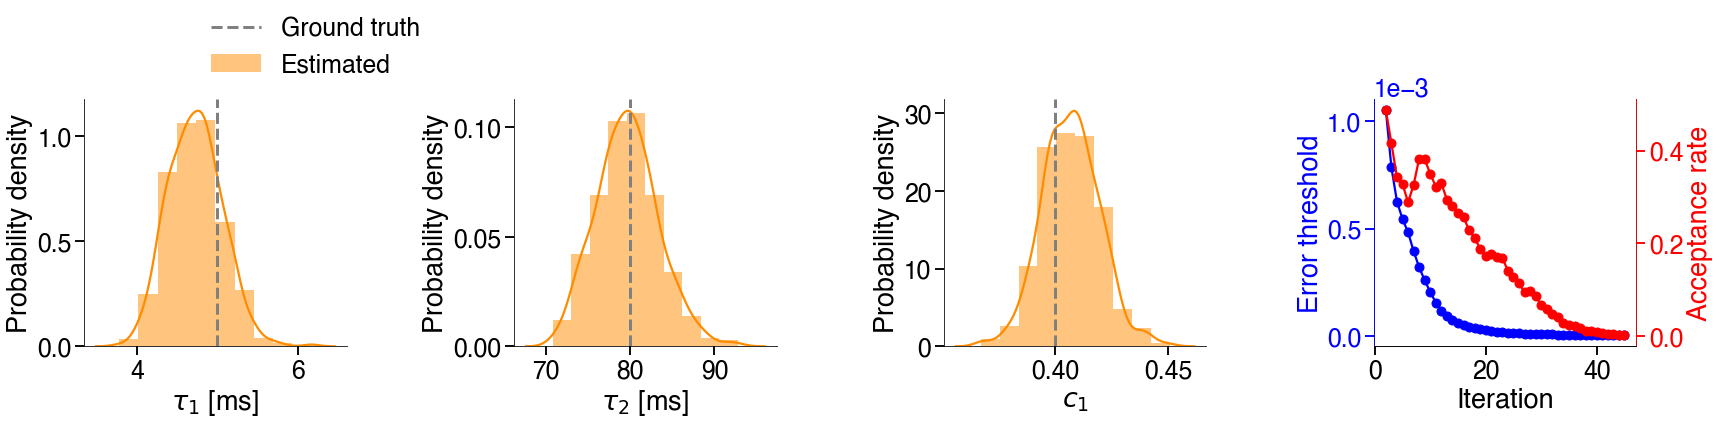

In [3]:
# plot the results
fig = plt.figure(figsize = (24,6))

# plotting variables
cABC = 'darkorange'
ctheor = 'gray'
cAccR = 'r'
cErr = 'b'
a = 0.5
lw = 3

ax = plt.subplot(141)
ax.hist(tau1, facecolor= cABC, density=True, alpha = a, label = r'Estimated')
sns.kdeplot(tau1, data2=None, shade=False, vertical=False, color = cABC)
plt.axvline(tau1_gt, color = ctheor, label = r'Ground truth', linewidth = lw, linestyle = '--')

ax.set_xlabel(r'$\tau_1$ [ms]')
ax.set_ylabel('Probability density')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon = False, bbox_to_anchor=(0.4, 1))

ax = plt.subplot(142)
ax.hist(tau2, facecolor= cABC, density=True, alpha = a, label = r'Estimated')
sns.kdeplot(tau2, data2=None, shade=False, vertical=False, color = cABC)
plt.axvline(tau2_gt, color = ctheor, label = r'Ground truth', linewidth = lw, linestyle = '--')
ax.set_xlabel(r'$\tau_2$ [ms]')
ax.set_ylabel('Probability density')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(143)
ax.hist(c1, facecolor= cABC, density=True, alpha = a, label = r'Estimated')
sns.kdeplot(c1, data2=None, shade=False, vertical=False, color = cABC)
plt.axvline(c1_gt, color = ctheor, label = r'Ground truth', linewidth = lw, linestyle = '--')
ax.set_xlabel(r'$c_1$')
ax.set_ylabel('Probability density')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(144)
ax.plot(steps,eps,'-o', color = cErr)
ax.set_xlabel('Iteration')
ax.set_ylabel('Error threshold', color = cErr)
plt.ticklabel_format(axis="y", style="sci", scilimits= (0,0))

ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax5 = ax.twinx()
ax5.plot(steps, accR,'-o', color = cAccR)
ax5.set_ylabel('Acceptance rate', color = cAccR)

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_color(cAccR)
ax5.spines['left'].set_color(cErr)
ax5.tick_params(axis='y', colors=cAccR)
ax.tick_params(axis='y', colors=cErr)


fig.tight_layout()

# Compute MAP estimates from posteriors

In [4]:
# load abc results
data_abc_path = 'example_abc_results/'
filename = '2on_inhomPois_tau5_80_T1000_lag110_steps45'
abc_results = np.load(data_abc_path + filename + '.npy', allow_pickle=True)
ind = filename.find('steps') 
final_step = int(filename[ind+5] + filename[ind+6])

# extract estimated parameters
theta_accepted = abc_results[final_step-1]['theta accepted']

# find MAPs
N = 20000 # number of samples for grid search
theta_MAP = abcTau.find_MAP(theta_accepted, N)
print(theta_MAP)

[ 4.62407655 78.9278164   0.4087252 ]


# Perform Bayesian model comparison

The example in Fig. 5C.

Run the model comparison module for fitted models with aABC algorithm. This example takes about 5 min to run.

In [6]:
# load abc fits 
datasave_path = 'example_abc_results/'
dataload_path = 'example_data/'

file = '1on_inhomPois_tau5_80_T1000_lag110_steps29.npy'
abc_results1 = np.load(datasave_path + file, allow_pickle=True) 
ind = file.find('steps') 
final_step1 = int(file[ind+5] + file[ind+6])


file = '2on_inhomPois_tau5_80_T1000_lag110_steps45.npy'
abc_results2 = np.load(datasave_path + file, allow_pickle=True) 
ind = file.find('steps') 
final_step2 = int(file[ind+5] + file[ind+6])


# load real data and set fitting params, time-series of data (numTrials * numTimePoints)
filename = 'inhomPois_tau5_80_coeff04_T1000_trials500_deltaT1_data_mean1_data_var1.25'
real_data = np.load(dataload_path + filename + '.npy')

deltaT = 1 # temporal resolution of data.
binSize = 1 #  bin-size for binning data and computing the autocorrelation.
maxTimeLag = 110 # maximum time-lag


# set the generative models, summary statistic metric and distance functions
model1 = 'oneTauOU_poissonSpikes'
model2 = 'twoTauOU_poissonSpikes'
distFunc = 'linear_distance'
summStat_metric = 'comp_ac_fft'
ifNorm = True # normalize the autocorrelations to the zero time-lag

# set the values if any of the models used disperssion parameters from the grid search method
disp1 = None # disperssion for model1
disp2 = None # disperssion for model1


# set parameters for computing CDFs
eval_start = 3 # number of smallest errors we ignore before starting CDF computation.
numSamplesModelComp = 1000 # number of samples from posterior distributions to compute the Bayes factor.

d1, d2, cdf1, cdf2, err_threshs, bf = \
abcTau.model_comp(real_data, deltaT, binSize, maxTimeLag, abc_results1,final_step1, abc_results2, final_step2,\
              model1, model2, distFunc, summStat_metric, ifNorm, numSamplesModelComp, eval_start, disp1, disp2)

Plot CDFs, Bayes factors and report the selected model

Two timescales better describe the data.


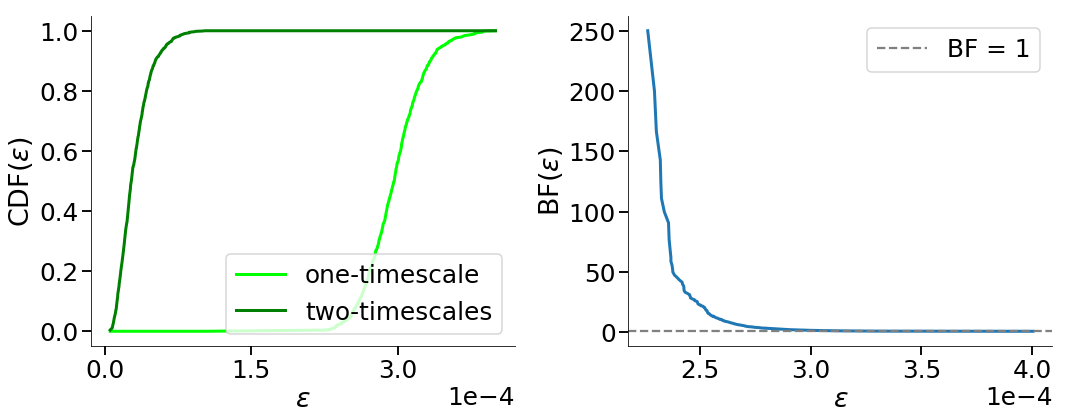

In [7]:
fig = plt.figure(figsize = (15,6))
c2 = 'g'
c1 = 'lime'
lw = 3

ax = plt.subplot(121)
plt.plot(err_threshs, cdf1, color = c1, linewidth = lw, label = 'one-timescale')
plt.plot(err_threshs, cdf2, color = c2, linestyle = '-', linewidth = lw, label = 'two-timescales')
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'CDF$(\varepsilon)$')
ax.legend()
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


ax = plt.subplot(122)
plt.plot(err_threshs, bf, linewidth = lw)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.axhline(1, color = 'gray', linestyle = '--', label = 'BF = 1')
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'BF$(\varepsilon)$')
ax.legend()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()

# Check if Bayes factor is larger than some threshold
# Due to the noisiness of data threshold on bf can also be set to values close to 1 like 0.9. 
# We also sugested a different solution for noisy data in Zeraati et al., Nature Commun., 2023
bf_thresh = 1
if np.sum((bf < bf_thresh)) == 0:
    print('Two timescales better describe the data.')

Plot CDFs, Bayes factors and report the selected model from previously saved distances of models

In [8]:
# load computed distances for each model
data_abc_path = 'example_modelComparison/'
d2 = np.load(data_abc_path + 'dABC_linDist_2on_dbSpikes_5_80_b1_a05_T1000_timeLag110.npy')
d1 = np.load(data_abc_path + 'dABC_linDist_1on_dbSpikes_5_80_b1_a05_T1000_timeLag110.npy')

numSamplesModelComp = 1000 # number of samples from posterior distributions to compute the Bayes factor.
cdf1, cdf2, err_threshs, bf = abcTau.comp_cdf(d1, d2, numSamplesModelComp, eval_start = 3)

Two timescales better describe the data.


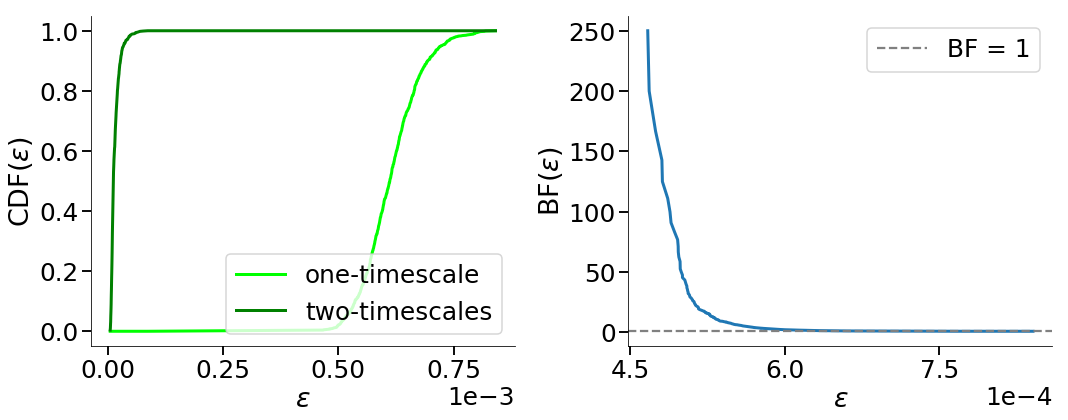

In [9]:
fig = plt.figure(figsize = (15,6))
c2 = 'g'
c1 = 'lime'
lw = 3

ax = plt.subplot(121)
plt.plot(err_threshs, cdf1, color = c1, linewidth = lw, label = 'one-timescale')
plt.plot(err_threshs, cdf2, color = c2, linestyle = '-', linewidth = lw, label = 'two-timescales')
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'CDF$(\varepsilon)$')
ax.legend()
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


ax = plt.subplot(122)
plt.plot(err_threshs, bf, linewidth = lw)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.axhline(1, color = 'gray', linestyle = '--', label = 'BF = 1')
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'BF$(\varepsilon)$')
ax.legend()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()

# Check if Bayes factor is larger than some threshold
# Due to the noisiness of data threshold on bf can also be set to values close to 1 like 0.9. 
# We also sugested a different solution for noisy data in Zeraati et al., Nature Commun., 2023
bf_thresh = 1
if np.sum((bf < bf_thresh)) == 0:
    print('Two timescales better describe the data.')